# Klasifikasi Gambar Sensor EWS Trafo Menggunakan Metode CNN

## Alfendio Alif Faudisyah - FTI UKSW

# Import Library

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Membangun dan Mengenali Dataset

## Membangun Dataset

In [2]:
import pathlib
data_dir = pathlib.Path('C:/Users/alfen/OneDrive/Pictures/Duplikat Dataset Sensor EWS Trafo')

image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

9750


In [9]:
#MQ4 = list(data_dir.glob('MQ 4/*.jpg'))
#PIL.Image.open(str(MQ4[0])).show()

## Standarisasi Dataset

In [3]:
img_height = 180
img_width = 180
batch_size = 32

## Membagi Dataset

In [4]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "training",
    seed = 123, # random image
    image_size = (img_height, img_width),
    batch_size = batch_size
    )

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "validation",
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size
    )

Found 9750 files belonging to 5 classes.
Using 7800 files for training.
Found 9750 files belonging to 5 classes.
Using 1950 files for validation.


## Cari nama kelas

In [5]:
class_names = train_ds.class_names
print(class_names)

['CT PZEM 044t', 'MQ 4', 'MQ 8', 'PZEM 044t', 'Thermocouple Type K']


# Visualisasi Dataset

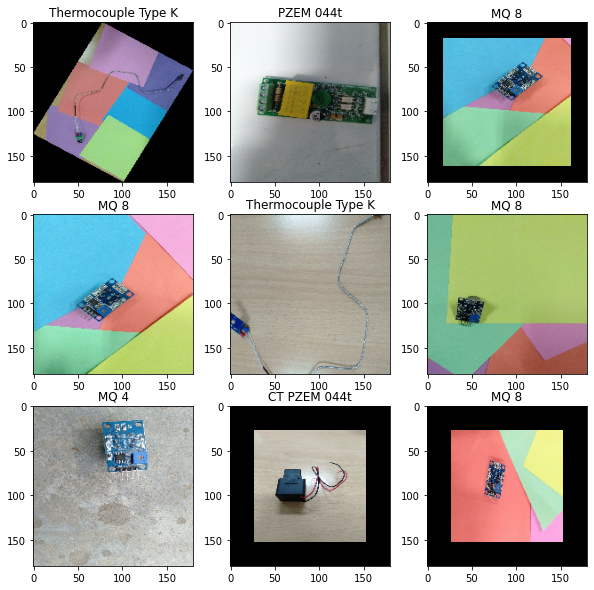

In [8]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8")) # convert bentuk image vektor RGB ke uint8
        plt.title(class_names[labels[i]])

# Tuning

In [9]:
# Tune dataset 
# Membuat data ada di memori
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Membangun Model Klasifikasi

## Create Model CNN

In [10]:
# Class target < - 5 class
num_classes = 5

model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)), # rescaling menjadi greyscale
    layers.Conv2D(16, 3, padding='same', activation='relu'), # membuat convolutional layer 2D
    layers.MaxPooling2D(), # membuat max pooling layer 2D -> menyimpan feature yang akan kita simpan, menyimpan pooling dari conv 2D
    layers.Conv2D(32, 3, padding='same', activation='relu'), 
    layers.MaxPooling2D(), 
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2), # dropout layer -> menghilangkan neuron yang tidak terlalu penting, mengurangi overfitting
    layers.Flatten(), # flatten layer -> mengubah bentuk 2D menjadi array 1D
    layers.Dense(128, activation='relu'), # mencari hubungan dari maxpoling 2D yang didapatkan, flatten
    layers.Dense(num_classes) # output layer
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [12]:
# Compile Model CNN
# Compile model untuk melakukan training
model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

# Train Model

In [13]:
# Train Model 
epochs = 15

# Simpan dalam history
history = model.fit( 
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/15
244/244 [==============================] - 607s 503ms/step - loss: 0.9993 - accuracy: 0.5950 - val_loss: 0.5075 - val_accuracy: 0.8072
Epoch 2/15
244/244 [==============================] - 24s 99ms/step - loss: 0.4348 - accuracy: 0.8256 - val_loss: 0.4207 - val_accuracy: 0.8421
Epoch 3/15
244/244 [==============================] - 24s 98ms/step - loss: 0.3003 - accuracy: 0.8800 - val_loss: 0.3106 - val_accuracy: 0.8728
Epoch 4/15
244/244 [==============================] - 24s 98ms/step - loss: 0.2121 - accuracy: 0.9167 - val_loss: 0.2730 - val_accuracy: 0.8918
Epoch 5/15
244/244 [==============================] - 24s 97ms/step - loss: 0.1524 - accuracy: 0.9427 - val_loss: 0.2123 - val_accuracy: 0.9215
Epoch 6/15
244/244 [==============================] - 24s 98ms/step - loss: 0.1108 - accuracy: 0.9553 - val_loss: 0.2141 - val_accuracy: 0.9282
Epoch 7/15
244/244 [==============================] - 24s 97ms/step - loss: 0.0903 - accuracy: 0.9674 - val_loss: 0.2066 - val_accurac

# Visualisasi Training

Text(0.5, 1.0, 'Training and Validation Loss')

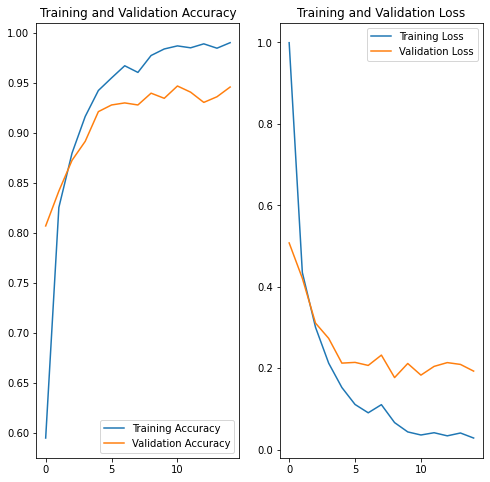

In [14]:
# Visualisasi Training Akurasi 
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Visualisasi Training Loss
loss = history.history['loss']
val_loss = history.history['val_loss']

# Epochs 
epochs_range = range(epochs)
plt.figure(figsize=(8, 8)) # Tampilan dalam figure

plt.subplot(1, 2, 1) # Tampilan sisi per sisi
plt.plot(epochs_range, acc, label='Training Accuracy') # Plot akurasi training
plt.plot(epochs_range, val_acc, label='Validation Accuracy') # Plot akurasi validasi
plt.legend(loc='lower right') 
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss') # Plot loss training
plt.plot(epochs_range, val_loss, label='Validation Loss') # Plot loss validasi
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

# Testing

## Ambil 1 gambar di internet

In [27]:
test_url = "https://static-01.daraz.pk/p/e44b816c6cddd662218fe8a6ab226594.jpg"
test_path = tf.keras.utils.get_file('', origin=test_url)

img = keras.preprocessing.image.load_img(test_path, target_size=(img_height, img_width))

img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

prediction = model.predict(img_array)
score = tf.nn.softmax(prediction[0])

print("Gambar ini adalah {} dengan akurasi {:.2f}%.".format(class_names[np.argmax(score)], 100 * np.max(score)))

1/1 [==============================] - 0s 27ms/step
Gambar ini adalah CT PZEM 044t dengan akurasi 100.00%.


# Save the model

In [30]:
model.save ("Save model/model_percobaan_6")

INFO:tensorflow:Assets written to: Save model/model_percobaan_6\assets


INFO:tensorflow:Assets written to: Save model/model_percobaan_6\assets


In [31]:
model.save ("Save model/model_percobaan_6.h5")